# Travel company data analysis

By Rokas Burneika

*Dataset from [Kaggle](https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data)*

**Context**

A Tour & Travels Company Is Offering Travel Insurance Package To Their Customers.

The New Insurance Package Also Includes Covid Cover.

The Company Requires To Know The Which Customers Would Be Interested To Buy It Based On Its Database History.

The Insurance Was Offered To Some Of The Customers In 2019 And The Given Data Has Been Extracted From The Performance/Sales Of The Package During That Period.

The Data Is Provided For Almost 2000 Of Its Previous Customers And You Are Required To Build An Intelligent Model That Can Predict If The Customer Will Be Interested To Buy The Travel Insurance 

Package Based On Certain Parameters Given Below.

**Goal** 

Figure out what clients would be interested in travel insurance.

Expected Model results: 

* High recall and low precision: we want the model to maximize recall to detect most of the clients that would buy rather than minimizing the quantity of those who after getting an offer would decline.
    
* Accuracy at least 75. We do not want to send emails to every client possible.

**Contents:**
1. Data imports
2. EDA
3. Statistical inference
4. Data preparation
5. Model training
6. Summary

# 1. Data imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utililties import *
import warnings


np.random.seed(10)

warnings.filterwarnings('ignore')

plt.style.use('ggplot')

df = pd.read_csv('./TravelInsurancePrediction.csv', index_col=0)
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1987.0,29.650226,2.913308,25.0,28.0,29.0,32.0,35.0
AnnualIncome,1987.0,932762.959235,376855.684748,300000.0,600000.0,900000.0,1250000.0,1800000.0
FamilyMembers,1987.0,4.752894,1.609650,2.0,4.0,5.0,6.0,9.0
ChronicDiseases,1987.0,0.277806,0.448030,0.0,0.0,0.0,1.0,1.0
TravelInsurance,1987.0,0.357323,0.479332,0.0,0.0,0.0,1.0,1.0


In [3]:
df.isna().any().any()

False

There are no null values in the dataset. 

Meaning there are 1987 rows given.

In [4]:
df.duplicated().sum()

738

In [5]:
for col in df.columns:
    print(f'Distinct values for "{col}" are: {df[col].unique()}\n')

Distinct values for "Age" are: [31 34 28 25 33 26 32 29 35 30 27]

Distinct values for "Employment Type" are: ['Government Sector' 'Private Sector/Self Employed']

Distinct values for "GraduateOrNot" are: ['Yes' 'No']

Distinct values for "AnnualIncome" are: [ 400000 1250000  500000  700000 1150000 1300000 1350000 1450000  800000
 1400000  850000 1500000 1050000  350000 1100000  600000  900000  550000
  300000  750000 1200000 1000000  950000 1700000 1750000  650000  450000
 1650000 1800000 1550000]

Distinct values for "FamilyMembers" are: [6 7 4 3 8 9 5 2]

Distinct values for "ChronicDiseases" are: [1 0]

Distinct values for "FrequentFlyer" are: ['No' 'Yes']

Distinct values for "EverTravelledAbroad" are: ['No' 'Yes']

Distinct values for "TravelInsurance" are: [0 1]



Categorical features:

* Employment Type
* Graduate or Not
* Chronic Diseases - does the client have any chronic diseases (0 for No and 1 for Yes)
* Frequent Flyer
* Ever Travelled Abroad
* Travel Insurance - does the client have travel insurance (0 for No and 1 for Yes)

Numerical features:

* Age
* Annual Income
* Family Members - family member count

# 2. Basic EDA

We start off with some basic EDA.

## 2.1. Travel Insurance

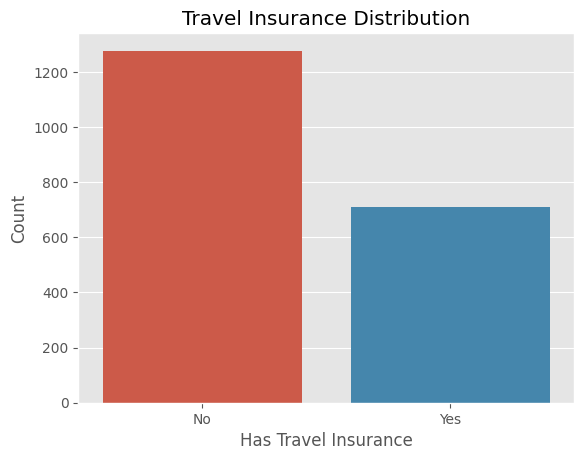

In [6]:
sns.countplot(
    data=df,
    x='TravelInsurance'
)

plt.title('Travel Insurance Distribution')

plt.xticks([0, 1], ['No', 'Yes'])

plt.ylabel('Count')
plt.xlabel('Has Travel Insurance')

plt.show()

We can see that the number of clients that have Travel Insurance is almost twice as low as a number of clients who do not have it.

Also, the classes are mildly unbalanced.

## 2.2. Age

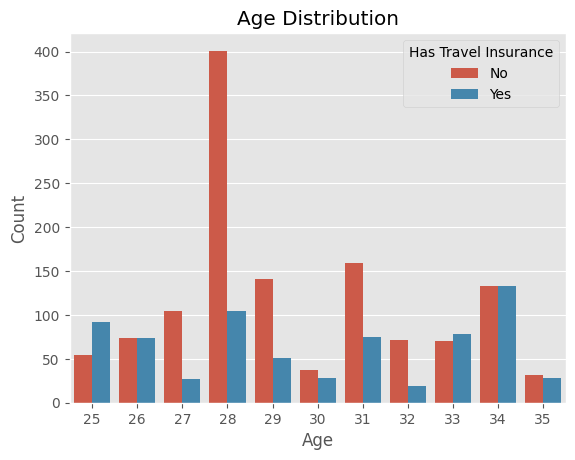

In [7]:
sns.countplot(
    data=df,
    x='Age',
    hue='TravelInsurance'
)

plt.title('Age Distribution')

plt.legend(title='Has Travel Insurance', labels=['No', 'Yes'])

plt.ylabel('Count')

plt.show()

Most of the clients are aged 28.

Clients of years 26 and 33 or older are balanced regarding Travel Insurance. Only for age of 25 more people have it.

## 2.3. Employment Type

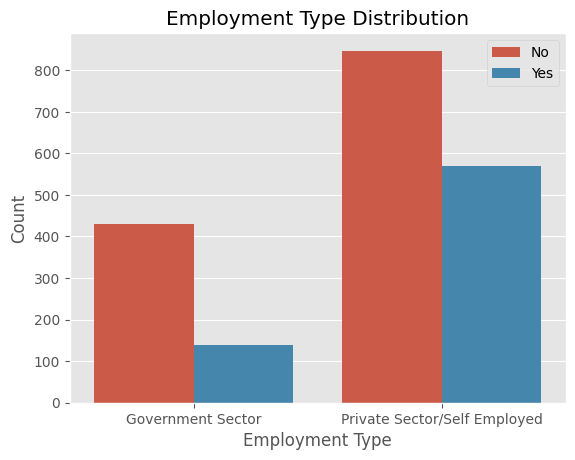

In [8]:
sns.countplot(
    data=df,
    x='Employment Type',
    hue='TravelInsurance'
)

plt.title('Employment Type Distribution')

plt.legend(labels=['No', 'Yes'])

plt.ylabel('Count')

plt.show()

More clients are employed in private sector.

For both sectors there are more people without Travel Insurance, but the rates for having insurance in private sector are higher.

## 2.4. Graduate or Not

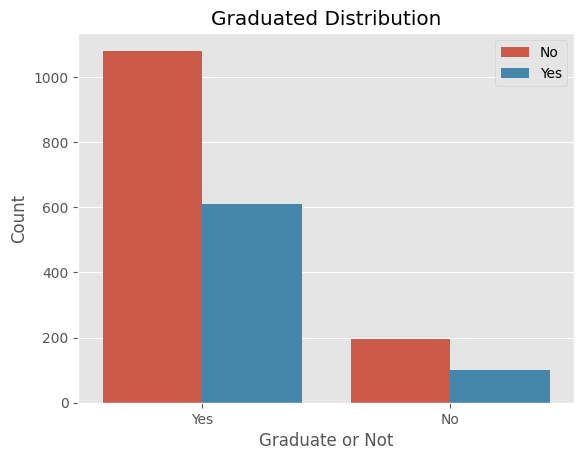

In [9]:
sns.countplot(
    data=df,
    x='GraduateOrNot',
    hue='TravelInsurance'
)

plt.title('Graduated Distribution')

plt.legend(labels=['No', 'Yes'])

plt.ylabel('Count')
plt.xlabel('Graduate or Not')

plt.show()

There are more graduated clients.

Rates of having insurance for both classes are quite similar, with people having travel insurance twice as low as not having.

## 2.5. Annual Income

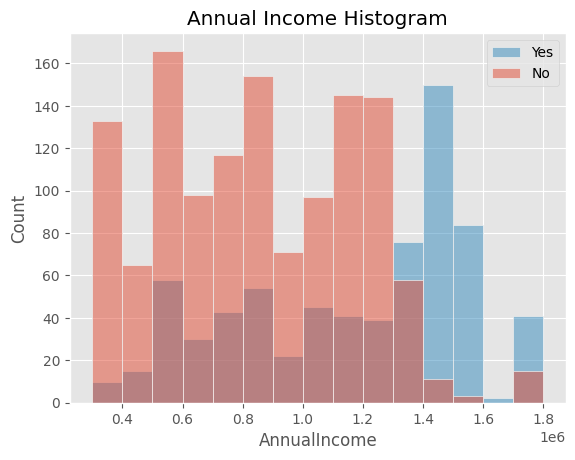

In [10]:
sns.histplot(
    data=df,
    x='AnnualIncome',
    hue='TravelInsurance'
)

plt.title('Annual Income Histogram')

plt.legend(labels=['Yes', 'No'])

plt.ylabel('Count')

plt.show()

Richer people tend to have Travel Insurance.

## 2.6. Family Members

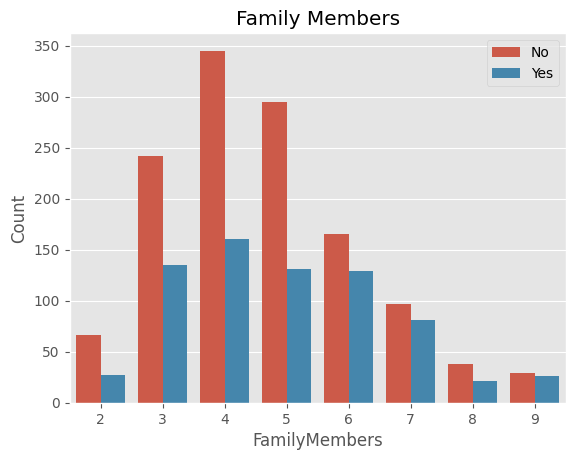

In [11]:
sns.countplot(
    data=df,
    x='FamilyMembers',
    hue='TravelInsurance'
)

plt.title('Family Members')

plt.legend(labels=['No', 'Yes'])

plt.ylabel('Count')

plt.show()

Most clients have a family of 4 members (husband, wife and two kids).

However, Travel Insurance is more common among families with more members.

## 2.7. Chronic Diseases

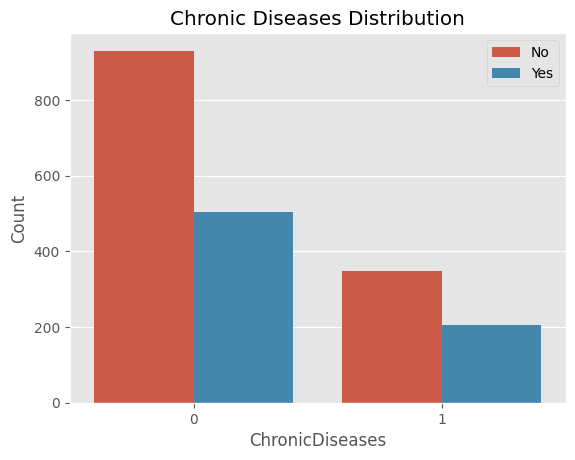

In [12]:
sns.countplot(
    data=df,
    x='ChronicDiseases',
    hue='TravelInsurance'
)

plt.title('Chronic Diseases Distribution')

plt.legend(labels=['No', 'Yes'])

plt.ylabel('Count')

plt.show()

Rates of having Travel Insurance is higher among people with Chronic Diseases.

However, there are more clients without them.

## 2.7. Frequent Flyers

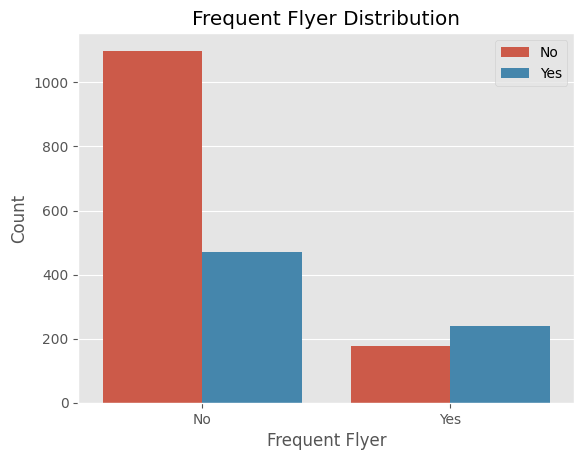

In [13]:
sns.countplot(
    data=df,
    x='FrequentFlyer',
    hue='TravelInsurance'
)

plt.title('Frequent Flyer Distribution')

plt.legend(labels=['No', 'Yes'])

plt.ylabel('Count')
plt.xlabel('Frequent Flyer')

plt.show()

More frequent flyers have Travel Insurance.

More than two halfs of non-frequently flying people do not have travel insurance.

## 2.8. Ever Travelled Abroad

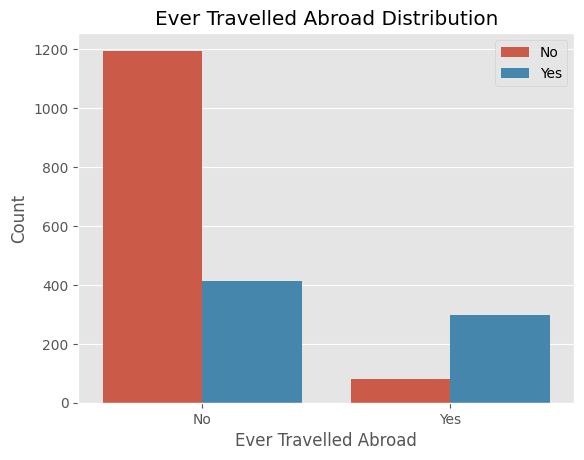

In [14]:
sns.countplot(
    data=df,
    x='EverTravelledAbroad',
    hue='TravelInsurance'
)

plt.title('Ever Travelled Abroad Distribution')

plt.legend(labels=['No', 'Yes'])

plt.ylabel('Count')
plt.xlabel('Ever Travelled Abroad')

plt.show()

More people have never travelled abroad and most of them do not have travel insurance.

Of those who have around 4 fifths have Travel Insurance.

## 2.9. Age by Annual Income

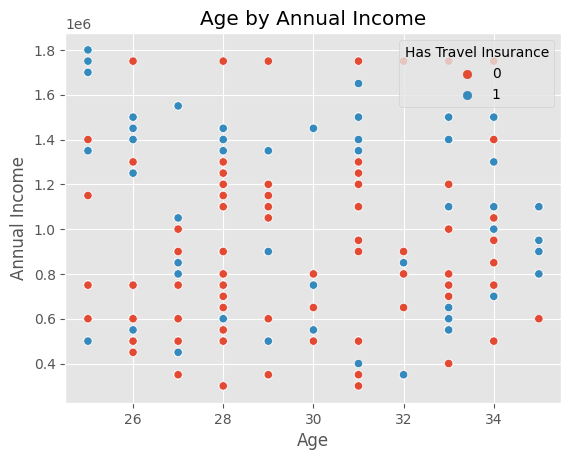

In [15]:
sns.scatterplot(data=df, x='Age', y='AnnualIncome', hue='TravelInsurance')

plt.title('Age by Annual Income')

plt.legend(title='Has Travel Insurance')

plt.ylabel('Annual Income')

plt.show()

Age by Annual Income scatter plot. 

Only thing is that richer people have more blue dots meaning more clients with travel insurance.

## 2.10. Age by Family Member Count

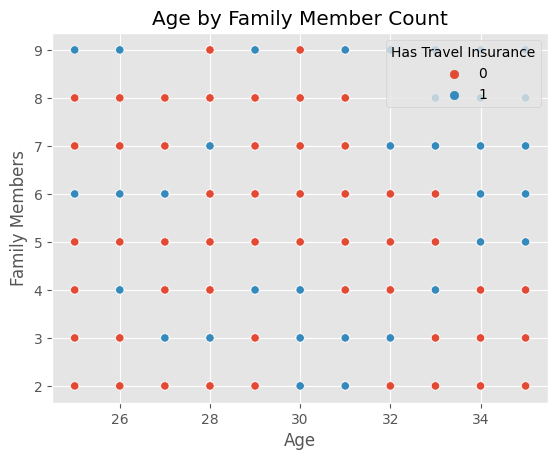

In [16]:
sns.scatterplot(data=df, x='Age', y='FamilyMembers', hue='TravelInsurance')

plt.title('Age by Family Member Count')

plt.legend(title='Has Travel Insurance')

plt.ylabel('Family Members')

plt.show()

No patter here either. Except that there are more red dots than blue, which is normal knowing the distribution.

## 2.11. Annual Income by Family Member Count

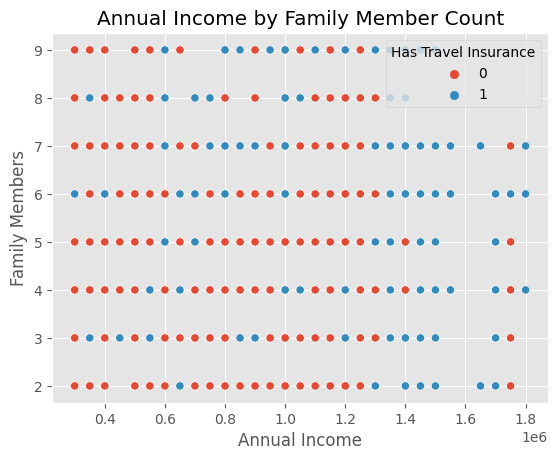

In [17]:
sns.scatterplot(data=df, x='AnnualIncome', y='FamilyMembers', hue='TravelInsurance')

plt.title('Annual Income by Family Member Count')

plt.legend(title='Has Travel Insurance')

plt.ylabel('Family Members')
plt.xlabel('Annual Income')

plt.show()

Only thing is that richer people have more blue dots meaning more clients with travel insurance.

## 2.12. Employment Type by Annual Income

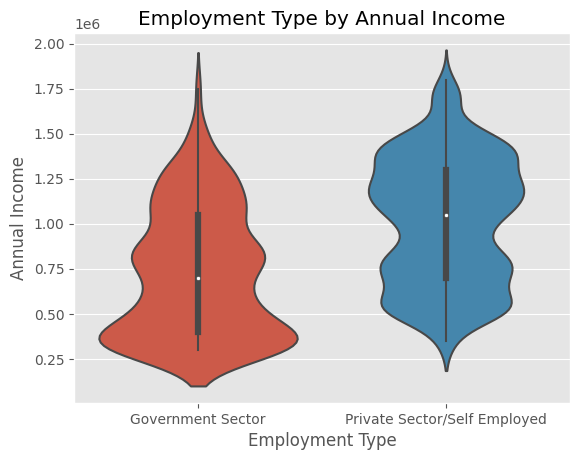

In [18]:
sns.violinplot(data=df, x='Employment Type', y='AnnualIncome')

plt.title('Employment Type by Annual Income')

plt.ylabel('Annual Income')

plt.show()

Private sector has higher Annual Income.

## 2.13. Graduated by Annual Income

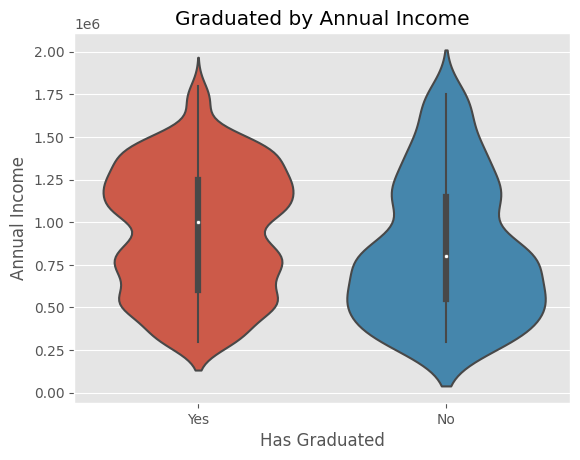

In [19]:
sns.violinplot(data=df, x='GraduateOrNot', y='AnnualIncome')

plt.title('Graduated by Annual Income')

plt.ylabel('Annual Income')
plt.xlabel('Has Graduated')

plt.show()

On average, pleople that have graduated have bigger Annual Income.

However, class with people that have not graduated has wider range and their max value is higher that the first class.

***
# 3. Statistical Inference

Null hypothesis: There is no difference in Annual Income between clients with small (<=5 members) and big (>5 members) families.

Alternative hypothesis: There is a significant difference in Annual Income between clients with small and big families.

Population - all rows count (1987)

Confidence Level - 95%

Margin of Error - 5%

Sample size - 323 (Based on [Survey Monkey's Sample Size Calculator](https://www.surveymonkey.com/mp/sample-size-calculator/))

In [20]:
low = df[df['FamilyMembers'] <= 5]
high = df[df['FamilyMembers'] > 5]

In [21]:
import math
import scipy.stats as st

sample = low['AnnualIncome'].sample(323).values
population = df['AnnualIncome']

t_statistic, p_value = st.ttest_ind(sample, population)

print(t_statistic, p_value)

0.12558597312350578 0.9000706047391012


P-value is extremely big, meaning Null Hypothesis is true - there is no significant differences of Annual Income between members from small and big families.

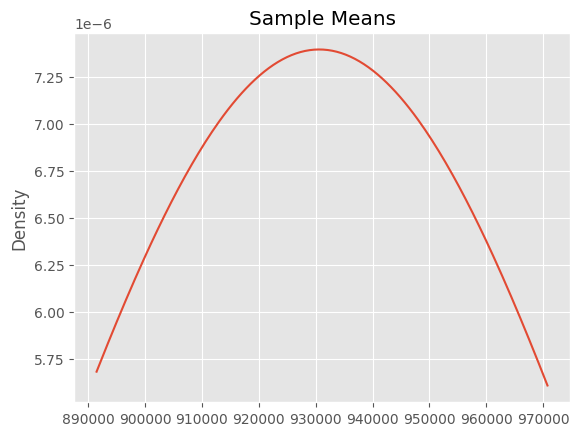

In [22]:
np.random.seed(10)

fig, ax = plt.subplots()

annual_income_estimates = []
intervals = []

sample_size = 382

for i in range(25):
    sample = low['AnnualIncome'].sample(323).values
    
    sample_mean = np.mean(sample)

    z_critical = st.norm.ppf(q = 0.95)

    pop_stdev = np.std(population)

    margin_of_error = z_critical * (pop_stdev / np.sqrt(sample_size))

    confidence_interval = (sample_mean + margin_of_error, sample_mean - margin_of_error)

    annual_income_estimates.append(np.mean(sample))
    intervals.append(confidence_interval)

sns.kdeplot(data=annual_income_estimates,
            bw_adjust=5,
            cut=0)

plt.title('Sample Means')

plt.show()

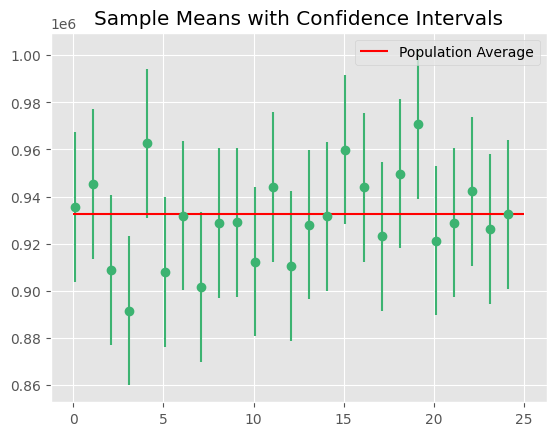

In [23]:
plt.errorbar(x=np.arange(0.1, 25, 1),
             y=annual_income_estimates,
             yerr=[(top - bot) / 2 for top, bot in intervals],
             fmt='o',
             color='mediumseagreen')

plt.hlines(xmin=0,
           xmax=25,
           y=np.mean(population),
           label='Population Average',
           color='red')

plt.legend()

plt.title('Sample Means with Confidence Intervals')

plt.show()

***
# 4. Data preparation

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
cols = ['FrequentFlyer', 'EverTravelledAbroad', 'GraduateOrNot']

for col in cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

df['Employment Type'] = df['Employment Type'].map({'Government Sector': 0, 'Private Sector/Self Employed': 1})

Changing values of categorical features to 0 and 1. 

Since all of the features have only 2 clasess there is no need for Encoding variables.

In [26]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0


## Correlations with Travel Insurance

In [27]:
corr_matrix = df[df.dtypes[df.dtypes == 'int64'].index].corr()
corr_matrix['TravelInsurance'].sort_values(ascending=False)

TravelInsurance        1.000000
EverTravelledAbroad    0.433183
AnnualIncome           0.396763
FrequentFlyer          0.232103
Employment Type        0.147847
FamilyMembers          0.079909
Age                    0.061060
GraduateOrNot          0.018934
ChronicDiseases        0.018190
Name: TravelInsurance, dtype: float64

Two most impactful features are EverTravelledAbroad and AnnualIncome.

There are no negatively correlated features.

## Data Split

In [28]:
X = df.drop('TravelInsurance', axis=1)
y = df['TravelInsurance']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

***
# 5. Model Training

In [30]:
models = pd.DataFrame(columns=['model', 'label', 'accuracy', 'recall', 'precision', 'rmse', 'threshold'])
models

,model,label,accuracy,recall,precision,rmse,threshold


Creating this DataFrame to store models' scores.

## 5.1. Module Import

In [31]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import (
    GridSearchCV,  
    StratifiedKFold
)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    roc_curve, 
    precision_recall_curve
)
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

## 5.2. Picking Values Randomly

In [32]:
y_pred = y.values.copy()
np.random.shuffle(y_pred)

model_report(y, y_pred)

Accuracy:
	 0.5259184700553599 

Confusion matrix:
 [[806 471]
 [471 239]] 

Classification report:
               precision    recall  f1-score   support

           0       0.63      0.63      0.63      1277
           1       0.34      0.34      0.34       710

    accuracy                           0.53      1987
   macro avg       0.48      0.48      0.48      1987
weighted avg       0.53      0.53      0.53      1987
 

RMSE:
	 0.6885357869745334 



This first model is guessing values at random while keeping the same distribution as original labels.

The accuracy is 53%. 

Recall is 34%.

Both scores are too low to match the requirements.

In [33]:
model_report(y, np.random.randint(0, 2, len(y)))

Accuracy:
	 0.4906894816305989 

Confusion matrix:
 [[644 633]
 [379 331]] 

Classification report:
               precision    recall  f1-score   support

           0       0.63      0.50      0.56      1277
           1       0.34      0.47      0.40       710

    accuracy                           0.49      1987
   macro avg       0.49      0.49      0.48      1987
weighted avg       0.53      0.49      0.50      1987
 

RMSE:
	 0.7136599458911794 



On the other hand, equally guessing classes (50/50) has an accuracy of 49% and recall of 47%, which is better than before

***
## Logistic Regression

In [34]:
lr_model = LogisticRegression(random_state=42)

lr_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', lr_model)
])

lr_pipe.fit(X_train, y_train)

y_pred = lr_pipe.predict(X_test)

model_report(y_test, y_pred)
rmse_scores(lr_model, X_train, y_train)

Accuracy:
	 0.7605633802816901 

Confusion matrix:
 [[296  25]
 [ 94  82]] 

Classification report:
               precision    recall  f1-score   support

           0       0.76      0.92      0.83       321
           1       0.77      0.47      0.58       176

    accuracy                           0.76       497
   macro avg       0.76      0.69      0.71       497
weighted avg       0.76      0.76      0.74       497
 

RMSE:
	 0.4893226131278932 

Training data RMSE mean:
	 0.5986499267237306 

Training data RMSE standard Deviation:
	 0.0027435339688644178 



Logistic Regression model has an accuracy of 76% and a recall of 0.47. 

It meets the requirement for accuracy.

RMSE of training data is higher than of testing, meaning there is no overfitting, but might be underfitted.

In [35]:
lr_model = LogisticRegression(random_state=42)

params = {
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga'],
    'C': np.logspace(-4, 4, 50),
    'penalty': ['l1', 'l2']
}

skf = StratifiedKFold(n_splits=10)

gs_lr_model = GridSearchCV(
    lr_model,
    params,
    cv=skf,
    scoring='recall',
    refit='recall_score',
    n_jobs=-1
)

gs_lr_model.fit(X_train, y_train)

gs_lr_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('gs_lr', gs_lr_model)
])

gs_lr_pipe.fit(X_train, y_train)

y_pred = gs_lr_pipe.predict(X_test)

model_report(y_test, y_pred)
rmse_scores(gs_lr_pipe, X_train, y_train)

Accuracy:
	 0.7364185110663984 

Confusion matrix:
 [[278  43]
 [ 88  88]] 

Classification report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81       321
           1       0.67      0.50      0.57       176

    accuracy                           0.74       497
   macro avg       0.72      0.68      0.69       497
weighted avg       0.73      0.74      0.73       497
 

RMSE:
	 0.5134018785840208 

Training data RMSE mean:
	 0.49575058660146415 

Training data RMSE standard Deviation:
	 0.03480260990380238 



Logistic Regression model with Scaler and best Parameters has accuracy of 73% and recall of 50%, meaning it does not meet the requirements. 

Tuning the threshold would result in lower recall value, therefore I choose to not include this Logistic Regression as a prominent model.

***
## k-NN

In [36]:
knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

model_report(y_test, y_pred)
rmse_scores(knn_model, X_train, y_train)

Accuracy:
	 0.8169014084507042 

Confusion matrix:
 [[301  20]
 [ 71 105]] 

Classification report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87       321
           1       0.84      0.60      0.70       176

    accuracy                           0.82       497
   macro avg       0.82      0.77      0.78       497
weighted avg       0.82      0.82      0.81       497
 

RMSE:
	 0.4279002121398116 

Training data RMSE mean:
	 0.4465091234916151 

Training data RMSE standard Deviation:
	 0.044405906340759346 



Default k-NN model has an accuracy of 82% and recall of 60% which is way better than Logistic regression. 

RMSE scores are quite similar.

In [37]:
score = model_score(
    y_test, 
    y_pred, 
    'knn_model', 
    'knn'
)

models = models.append(score, ignore_index=True)

In [38]:
knn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', knn_model)
])

knn_pipe.fit(X_train, y_train)

y_pred = knn_pipe.predict(X_test)

model_report(y_test, y_pred)
rmse_scores(knn_pipe, X_train, y_train)

Accuracy:
	 0.7686116700201208 

Confusion matrix:
 [[288  33]
 [ 82  94]] 

Classification report:
               precision    recall  f1-score   support

           0       0.78      0.90      0.83       321
           1       0.74      0.53      0.62       176

    accuracy                           0.77       497
   macro avg       0.76      0.72      0.73       497
weighted avg       0.76      0.77      0.76       497
 

RMSE:
	 0.4810284087035601 

Training data RMSE mean:
	 0.46780394741668874 

Training data RMSE standard Deviation:
	 0.035967971436868966 



k-NN model with scaling has lower accuracy and recall, thus I do not save it.

***
## SVC

In [39]:
svc_model = SVC(random_state=42, probability=True)

svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)

model_report(y_test, y_pred)
rmse_scores(svc_model, X_train, y_train)

Accuracy:
	 0.7847082494969819 

Confusion matrix:
 [[305  16]
 [ 91  85]] 

Classification report:
               precision    recall  f1-score   support

           0       0.77      0.95      0.85       321
           1       0.84      0.48      0.61       176

    accuracy                           0.78       497
   macro avg       0.81      0.72      0.73       497
weighted avg       0.80      0.78      0.77       497
 

RMSE:
	 0.4639954207780699 

Training data RMSE mean:
	 0.4795410708635918 

Training data RMSE standard Deviation:
	 0.030213317866068803 



Default SVC model has an accuracy of 78% and recall of 48%. Which is not bad.

RMSE scores are not far apart.

In [40]:
svc_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', svc_model)
])

svc_pipe.fit(X_train, y_train)
y_pred = svc_pipe.predict(X_test)

model_report(y_test, y_pred)
rmse_scores(svc_pipe, X_train, y_train)

Accuracy:
	 0.8048289738430584 

Confusion matrix:
 [[306  15]
 [ 82  94]] 

Classification report:
               precision    recall  f1-score   support

           0       0.79      0.95      0.86       321
           1       0.86      0.53      0.66       176

    accuracy                           0.80       497
   macro avg       0.83      0.74      0.76       497
weighted avg       0.81      0.80      0.79       497
 

RMSE:
	 0.44178164986443436 

Training data RMSE mean:
	 0.4370229370532176 

Training data RMSE standard Deviation:
	 0.03093963823659999 



After applying StandardScaler the model inproves its accuracy and recall with accuracy of 80% and recal of 53%.

Meaning there is some room to play with thresholds.

In [41]:
y_pred = svc_pipe.predict_proba(X_test)
y_pred = y_pred[:, 1]

model_report(y_test, adjust_class(y_pred, 0.23))

Accuracy:
	 0.7525150905432596 

Confusion matrix:
 [[253  68]
 [ 55 121]] 

Classification report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80       321
           1       0.64      0.69      0.66       176

    accuracy                           0.75       497
   macro avg       0.73      0.74      0.73       497
weighted avg       0.76      0.75      0.75       497
 

RMSE:
	 0.4974785517554907 



After tuning the threshold to 0.23 we are left with a model that provides 75% accuracy and 69% recall which are very good numbers for our needs.

In [42]:
score = model_score(
    y_test, 
    adjust_class(y_pred, 0.23),
    'svc_pipe',
    'tuned svc',
    0.23
)

models = models.append(score, ignore_index=True)

***
## RandomForestClassifier

In [43]:
rfc_model = RandomForestClassifier(random_state=42, n_jobs=-1)

rfc_model.fit(X_train, y_train)
y_pred = rfc_model.predict(X_test)

model_report(y_test, y_pred)
rmse_scores(rfc_model, X_train, y_train)

Accuracy:
	

 0.8048289738430584 

Confusion matrix:
 [[289  32]
 [ 65 111]] 

Classification report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       321
           1       0.78      0.63      0.70       176

    accuracy                           0.80       497
   macro avg       0.80      0.77      0.78       497
weighted avg       0.80      0.80      0.80       497
 

RMSE:
	 0.44178164986443436 

Training data RMSE mean:
	 0.45906504241804214 

Training data RMSE standard Deviation:
	 0.025858901811089085 



Random Forest Classifier give even better results with accuracy of 80% and recall of 63%.

RMSE scores are very close, meaning no overfitting.

In [44]:
params = {
    'criterion': ['entropy', 'gini', 'log_loss'],
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 300],
    'max_depth': [3, 5, 15, 25],
    'max_features': [3, 5, 10, 20]
}

gs_rfc_model = GridSearchCV(
    rfc_model,
    params,
    cv=10,
    scoring='recall',
    refit='recall_score',
    n_jobs=-1
)

gs_rfc_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('gs_rfc', gs_rfc_model)
])

gs_rfc_pipe.fit(X_train, y_train)

y_pred = gs_rfc_pipe.predict(X_test)

model_report(y_test, y_pred)
rmse_scores(gs_rfc_pipe, X_train, y_train)

Accuracy:
	 0.8229376257545271 

Confusion matrix:
 [[297  24]
 [ 64 112]] 

Classification report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87       321
           1       0.82      0.64      0.72       176

    accuracy                           0.82       497
   macro avg       0.82      0.78      0.79       497
weighted avg       0.82      0.82      0.82       497
 

RMSE:
	 0.4207878019209597 

Training data RMSE mean:
	 0.45410374704416007 

Training data RMSE standard Deviation:
	 0.03423941085976651 



After tuning hyperparameters we have a Random Forest model with 82% accuracy and 64% recall. 

It's the best one yet.

In [45]:
y_pred = gs_rfc_pipe.predict_proba(X_test)
y_pred = y_pred[:, 1]

model_report(y_test, adjust_class(y_pred, 0.34))

Accuracy:
	 0.7605633802816901 

Confusion matrix:
 [[255  66]
 [ 53 123]] 

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       321
           1       0.65      0.70      0.67       176

    accuracy                           0.76       497
   macro avg       0.74      0.75      0.74       497
weighted avg       0.77      0.76      0.76       497
 

RMSE:
	 0.4893226131278932 



Tuning threshold to 0.34 give us 76% accuracy and 70% recall.

Let's save this model for later.

In [46]:
score = model_score(
    y_test, 
    adjust_class(y_pred, 0.34),
    'gs_rfc_pipe',
    'tuned random forest',
    0.34
)

models = models.append(score, ignore_index=True)

***
## DecisionTreeClassifier

In [47]:
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

model_report(y_test, y_pred)
rmse_scores(dt_model, X_train, y_train)

Accuracy:
	 0.7887323943661971 

Confusion matrix:
 [[283  38]
 [ 67 109]] 

Classification report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       321
           1       0.74      0.62      0.67       176

    accuracy                           0.79       497
   macro avg       0.78      0.75      0.76       497
weighted avg       0.78      0.79      0.78       497
 

RMSE:
	 0.4596385597769217 

Training data RMSE mean:
	 0.48641057830446643 

Training data RMSE standard Deviation:
	 0.031442676905190446 



Accuracy and recall of Decision Tree model is quite good with 78% and 62% respectively.

Training data's RMSE score being a bit higher than RMSE of test data.

In [48]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,4,6,8,10,12]
}

gs_dt_model = GridSearchCV(
    dt_model,
    params,
    scoring='recall',
    refit='recall_score',
    n_jobs=-1
)

gs_dt_model.fit(X_train, y_train)

y_pred = gs_dt_model.predict(X_test)

model_report(y_test, y_pred)
rmse_scores(gs_dt_model, X_train, y_train)

Accuracy:
	 0.8008048289738431 

Confusion matrix:
 [[298  23]
 [ 76 100]] 

Classification report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86       321
           1       0.81      0.57      0.67       176

    accuracy                           0.80       497
   macro avg       0.80      0.75      0.76       497
weighted avg       0.80      0.80      0.79       497
 

RMSE:
	 0.44631286226833855 



Training data RMSE mean:
	 0.45298823510441305 

Training data RMSE standard Deviation:
	 0.038898178015971306 



Once again after tuning we get 80% accuracy and 57% recall.

In [49]:
y_pred = gs_dt_model.predict_proba(X_test)
y_pred = y_pred[:, 1]

model_report(y_test, adjust_class(y_pred, 0.33))

Accuracy:
	 0.7525150905432596 

Confusion matrix:
 [[268  53]
 [ 70 106]] 

Classification report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       321
           1       0.67      0.60      0.63       176

    accuracy                           0.75       497
   macro avg       0.73      0.72      0.72       497
weighted avg       0.75      0.75      0.75       497
 

RMSE:
	 0.4974785517554907 



Moving the threshold to 0.33 give us 75% accuracy and 60% recall.

In [50]:
score = model_score(
    y_test, 
    adjust_class(y_pred, 0.33),
    'gs_dt_model',
    'tuned decision tree',
    0.33
)

models = models.append(score, ignore_index=True)

***
## VotingClassifier

In [51]:
models

,model,label,accuracy,recall,precision,rmse,threshold
0,knn_model,knn,0.816901,0.596591,0.840000,0.427900,0.50
1,svc_pipe,tuned svc,0.752515,0.687500,0.640212,0.497479,0.23
2,gs_rfc_pipe,tuned random forest,0.760563,0.698864,0.650794,0.489323,0.34
3,gs_dt_model,tuned decision tree,0.752515,0.602273,0.666667,0.497479,0.33


Here we have all the models that we saved for later with their accuracy, recall, precision and RMSE scores.

In [52]:
voting_model = VotingClassifier(
    estimators=[
        ('dt', gs_dt_model),
        ('rfc', gs_rfc_pipe),
        ('svc', svc_pipe),
        ('knn', knn_model)
    ],
    voting='soft')

voting_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('voting', voting_model)
])

voting_pipe.fit(X_train, y_train)

y_pred = voting_pipe.predict(X_test)

model_report(y_test, y_pred)
rmse_scores(voting_pipe, X_train, y_train)

Accuracy:
	 0.8128772635814889 

Confusion matrix:
 [[301  20]
 [ 73 103]] 

Classification report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.87       321
           1       0.84      0.59      0.69       176

    accuracy                           0.81       497
   macro avg       0.82      0.76      0.78       497
weighted avg       0.82      0.81      0.80       497
 

RMSE:
	 0.4325768560828365 

Training data RMSE mean:
	 0.4400754988145188 

Training data RMSE standard Deviation:
	 0.04044216569338556 



Combining all of those models into one Voting model leaves us with accuracy if 81% and recall of 59%.

In [53]:
y_pred = voting_pipe.predict_proba(X_test)
y_pred = y_pred[:, 1]

model_report(y_test, adjust_class(y_pred, 0.33))

Accuracy:
	 0.7565392354124748 

Confusion matrix:
 [[261  60]
 [ 61 115]] 

Classification report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       321
           1       0.66      0.65      0.66       176

    accuracy                           0.76       497
   macro avg       0.73      0.73      0.73       497
weighted avg       0.76      0.76      0.76       497
 

RMSE:
	 0.4934174344178823 



After some threshold tuning we get 75% and 65%.

In [54]:
score = model_score(
    y_test,
    adjust_class(y_pred, 0.33),
    'voting_pipe',
    'voting',
    0.33
)

models = models.append(score, ignore_index=True)

Adding it to all models DataFrame.

## Model Comparison

Let's see how these models compare.

In [55]:
models.sort_values('recall', ascending=False)

,model,label,accuracy,recall,precision,rmse,threshold
2,gs_rfc_pipe,tuned random forest,0.760563,0.698864,0.650794,0.489323,0.34
1,svc_pipe,tuned svc,0.752515,0.687500,0.640212,0.497479,0.23
4,voting_pipe,voting,0.756539,0.653409,0.657143,0.493417,0.33
3,gs_dt_model,tuned decision tree,0.752515,0.602273,0.666667,0.497479,0.33
0,knn_model,knn,0.816901,0.596591,0.840000,0.427900,0.50


We can see that the best model for recall and accuracy is tuned Random Forest Classifier with 75% accuracy and 70% recall.

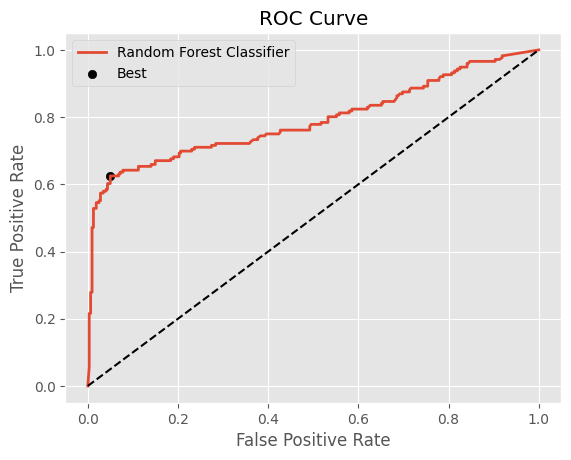

In [56]:
y_pred = gs_rfc_pipe.predict_proba(X_test)
y_pred = y_pred[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plot_roc_curve(fpr, tpr, 'Random Forest Classifier')

This is the ROC curve for out final Random Forest Classifier.

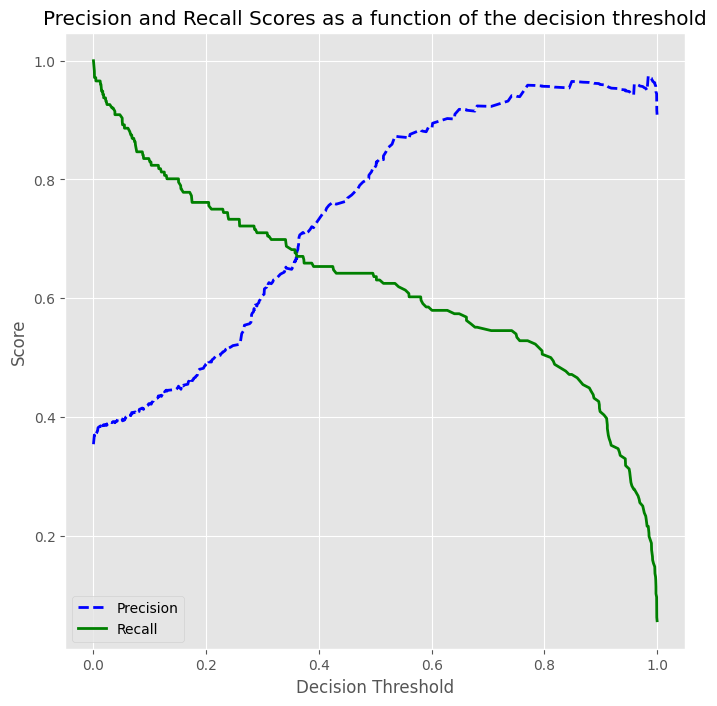

In [57]:
p, r, thresholds = precision_recall_curve(y_test, y_pred)
plot_precision_recall_vs_threshold(p, r, thresholds)

Here we can see how recall and precision are changind for each threshold of our final model.

Precision can never reach 0 or 1.

Values are intersecting at around 0.36.

***
# Summary

* Best model for predicting whether a client would take an offer on Travel Insurance is a tuned Random Forest Classifier.
* Most people do not have Travel Insurance.
* If a person has graduated, on average it means he or she has bigger Income, meaning more chances of having Travel Insurance.

***
# How to improve

* There could be more data. Having 2000 rows is not enough to propperly train ML anglorithms.
* Could be more features.
* More model variance, deeper look at hyperparameters.